In [2]:
import numpy as np
from math import pi
import pandas as pd
import matplotlib.pyplot as  plt

df = pd.read_csv("datos.csv")

In [35]:
def qi(a, V):
    ro = 817
    sigma = 1.29
    g = 9.81
    d = 5e-3
    return (4*pi*(a**3)*(ro-sigma)*g*d)/(3*V)

def qi_star(q, e):
    return int(q/e + 0.5)

In [36]:
e = np.arange(1e-19, 1.7e-19, 0.001e-19)

In [41]:
data = df[['Tension de Equilibrio (V)','radio(m)']]
a = list(data['radio(m)'])
print(a)
v = list(data['Tension de Equilibrio (V)'])
print(v)

[2.39e-06, 2.02e-06, 2.75e-06, 2.06e-06, 1.19e-06, 1e-06, 1.08e-06, 1.4e-06, 1.45e-06, 1.75e-06, 1.15e-06, 8.85e-07]
[279, 279, 278, 270, 138, 49, 40, 48, 85, 121, 71, 50]


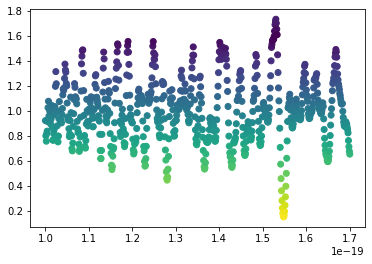

In [71]:
fe = []
approx = []
for i in e:
    sum = 0
    for j in range(0, len(a)):
        sum += (qi(a[j], v[j])/i - qi_star(qi(a[j], v[j]), i))**2
        j += 1
    i+=1
    fe.append(sum)

for i in fe:
    approx.append(abs(i-1.602))
    i+=1

b = np.array(approx)>0.3
    
plt.scatter(e, fe, c=approx, cmap='viridis')

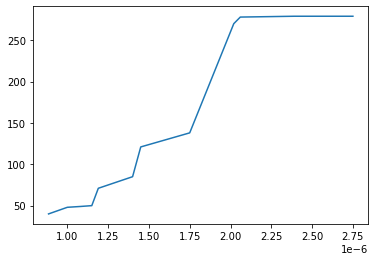

In [192]:
plt.plot(np.sort(a), np.sort(v))